# Notebook 2: Análisis de Coherencia Semántica

En este notebook, nos adentramos en el núcleo del análisis de coherencia. Utilizaremos el `EnhancedCoherenceAnalyzer` para construir un modelo semántico (LSA) a partir de nuestro corpus de textos filosóficos. Luego, aplicaremos este modelo para medir diferentes facetas de la coherencia en cada texto, como la coherencia de primer y segundo orden, y los patrones temporales.

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir el directorio raíz del proyecto al path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.philosophical_analysis.core.enhanced_coherence import EnhancedCoherenceAnalyzer

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")
print("Librerías y módulos cargados correctamente.")

Librerías y módulos cargados correctamente.


## 1. Cargar los Textos Filosóficos

In [2]:
data_path = project_root / "data" / "raw"
texts = {}

for file_path in data_path.glob("*.txt"):
    philosopher_name = file_path.stem.replace("_style", "").capitalize()
    with open(file_path, 'r', encoding='utf-8') as f:
        texts[philosopher_name] = f.read()

# Convertimos a un diccionario con IDs para el analizador
texts_dict = {name.lower(): content for name, content in texts.items()}

print(f"Se han cargado {len(texts_dict)} textos. IDs disponibles: {list(texts_dict.keys())}")

Se han cargado 11 textos. IDs disponibles: ['plato_republic', 'aquinas_summa_theologica', 'descartes_discourse_method', 'nietzsche_beyond_good_evil', 'aristotle_nicomachean_ethics', 'descartes_meditations', 'plato_apology', 'james_pragmatism', 'hume_human_understanding', 'kant_critique_pure_reason', 'maimonides_guide_perplexed']


## 2. Entrenar el Modelo de Coherencia (LSA)

In [3]:
# Inicializar el analizador de coherencia
coherence_analyzer = EnhancedCoherenceAnalyzer(n_components=15, window_size=5)

# Entrenar el modelo con todos los textos
print("Entrenando el modelo LSA...")
coherence_analyzer.fit(texts_dict)
print("¡Modelo entrenado con éxito!")

INFO:src.philosophical_analysis.core.enhanced_coherence:Enhanced Coherence Analyzer initialized with 15 components
INFO:src.philosophical_analysis.core.enhanced_coherence:Fitting enhanced analyzer on 11 texts


Entrenando el modelo LSA...


INFO:src.philosophical_analysis.core.enhanced_coherence:Enhanced analyzer fitted with 49663 sentences.


¡Modelo entrenado con éxito!


## 3. Analizar la Coherencia de Todos los Textos

In [4]:
coherence_results = []
for name, text in texts.items():
    result = coherence_analyzer.comprehensive_analysis(text, text_id=name.lower())
    result['philosopher'] = name
    coherence_results.append(result)

df_coherence = pd.DataFrame(coherence_results)
df_coherence.set_index('philosopher', inplace=True)

print("Análisis de coherencia completado.")
df_coherence.head()

INFO:src.philosophical_analysis.core.enhanced_coherence:Starting comprehensive coherence analysis for: plato_republic
INFO:src.philosophical_analysis.core.enhanced_coherence:Enhanced coherence analysis completed for plato_republic
INFO:src.philosophical_analysis.core.enhanced_coherence:Starting comprehensive coherence analysis for: aquinas_summa_theologica
INFO:src.philosophical_analysis.core.enhanced_coherence:Enhanced coherence analysis completed for aquinas_summa_theologica
INFO:src.philosophical_analysis.core.enhanced_coherence:Starting comprehensive coherence analysis for: descartes_discourse_method
INFO:src.philosophical_analysis.core.enhanced_coherence:Enhanced coherence analysis completed for descartes_discourse_method
INFO:src.philosophical_analysis.core.enhanced_coherence:Starting comprehensive coherence analysis for: nietzsche_beyond_good_evil
INFO:src.philosophical_analysis.core.enhanced_coherence:Enhanced coherence analysis completed for nietzsche_beyond_good_evil
INFO:src

Análisis de coherencia completado.


,text_id,sentence_count,vector_count,first_order_coherence,min_coherence,max_coherence,coherence_variance,second_order_coherence,coherence_change_rate,coherence_stability,...,coherence_trend,local_coherence_variance,phrase_separated_coherence,distant_coherence,coherence_decay_rate,t_statistic,p_value,effect_size,significant,analysis_type
philosopher,,,,,,,,,,,,,,,,,,,,,
Plato_republic,plato_republic,7779,7779,0.519898,-0.207660,0.996625,0.061190,0.776350,0.223650,0.801690,...,-0.363712,0.025868,0.510222,0.500860,0.011909,78.394933,0.000000e+00,0.888902,True,enhanced_coherence
Aquinas_summa_theologica,aquinas_summa_theologica,23646,23646,0.435499,-0.335461,1.000000,0.074695,0.749510,0.250490,0.785359,...,-0.045857,0.029977,0.417952,0.400098,0.018820,76.234640,0.000000e+00,0.495773,True,enhanced_coherence
Descartes_discourse_method,descartes_discourse_method,395,395,0.697232,-0.049697,0.967342,0.043877,0.844940,0.155060,0.826810,...,-0.483524,0.021896,0.691453,0.683310,0.006573,37.594370,3.123437e-132,1.893977,True,enhanced_coherence
Nietzsche_beyond_good_evil,nietzsche_beyond_good_evil,1648,1648,0.553873,-0.147525,1.000000,0.056656,0.788555,0.211445,0.807738,...,-0.059312,0.023935,0.532608,0.515483,0.016224,43.272096,7.988931e-274,1.066255,True,enhanced_coherence
Aristotle_nicomachean_ethics,aristotle_nicomachean_ethics,2787,2787,0.592586,-0.197529,1.000000,0.046490,0.813761,0.186239,0.822628,...,-0.314979,0.020535,0.573105,0.559121,0.013630,71.611883,0.000000e+00,1.356733,True,enhanced_coherence


## 4. Visualizar las Métricas de Coherencia

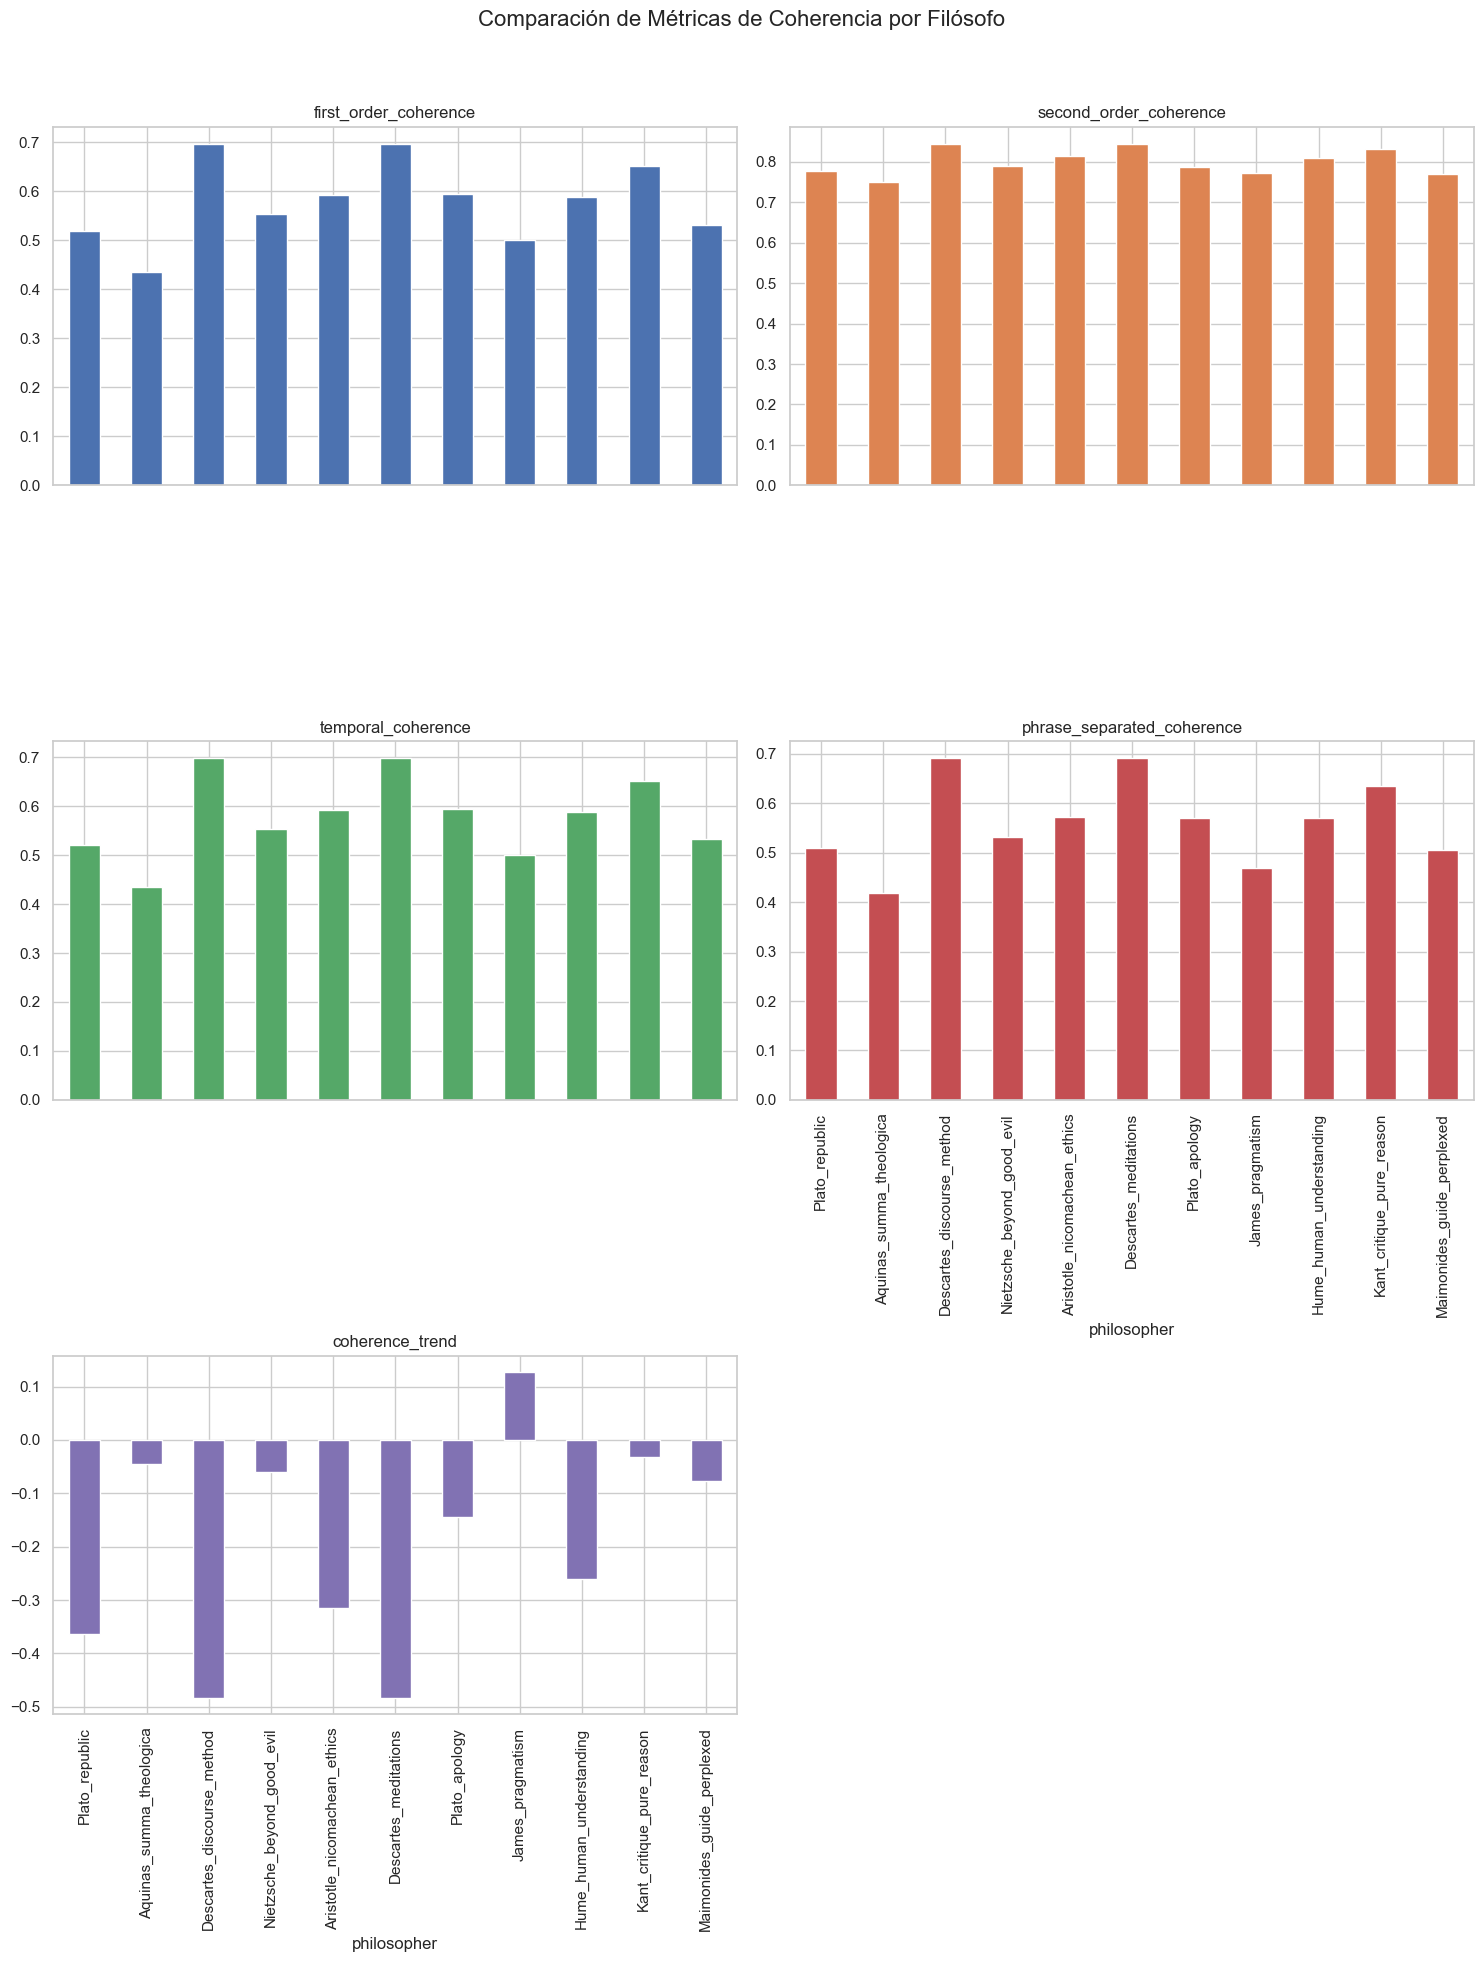

In [5]:
# Seleccionar las métricas de coherencia clave para visualizar
metrics_to_plot = [
    'first_order_coherence',
    'second_order_coherence',
    'temporal_coherence',
    'phrase_separated_coherence',
    'coherence_trend'
]

df_coherence[metrics_to_plot].plot(kind='bar', subplots=True, figsize=(15, 20), layout=(3, 2), legend=False)
plt.suptitle('Comparación de Métricas de Coherencia por Filósofo', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()